<center><b>Primer Modelo de ML</b></center>
<center><i>Primer Sprint</i></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Usuario/Downloads/DS_Proyecto_01_Datos_Properati.csv')

<center><i>Elección de Datos</i></center>

<justify>Para predecir el precio de las propiedades se tendrán en cuenta datos que describan un inmueble e influyan en el precio del mismo. De esta forma, la cantidad de habitaciones, baños y superficie total se utilizarán para el modelo. 

Se descartan el resto de las variables ya que aunque proveen información sobre la propiedad, estas no dan información lo suficientemente distintiva para el propósito del modelo.
</justify>




<center><i>Análisis exploratorio de datos</i></center>

<i>Estadísticas Descriptivas</i>

In [3]:
df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [4]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [5]:
df.isna().sum()/df.shape[0]*100

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

In [6]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Las variables de baños, superficie total, superficie cubierta, latitud y longitud son las únicas en presentar datos nulos. Las variables de superficie son las que presentan una mayor cantidad de datos nulos con 13.9% y 14.7% respectivamente.



<i>Correlación</i>

In [7]:
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Correlación')

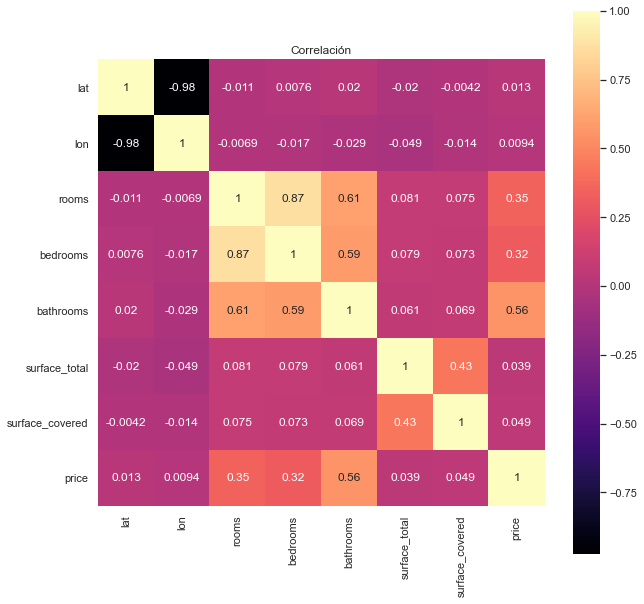

In [8]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, square=True, annot=True, cmap='magma').set_title('Correlación')

Aquí se puede observar que las variables que están más fuertemente correlacionadas con el precio son baños, habitaciones y dormitorios en orden descendiente.

Text(0.5, 1.0, 'Número de Habitaciones')

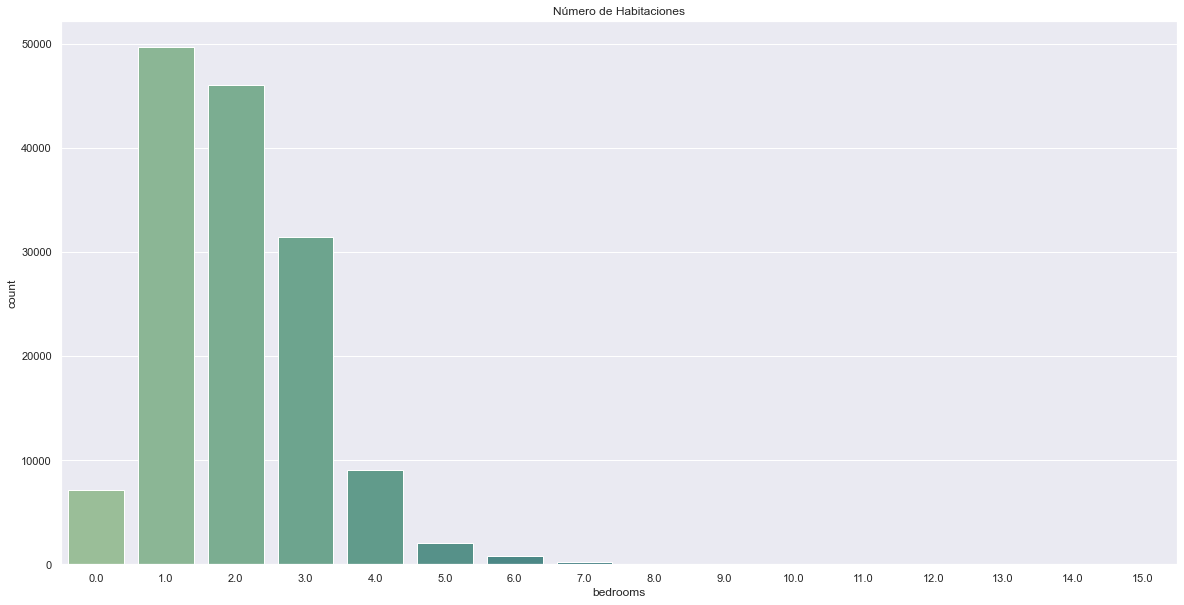

In [9]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, x = "bedrooms", palette='crest').set_title('Número de Habitaciones')

Text(0.5, 1.0, 'Número de Baños')

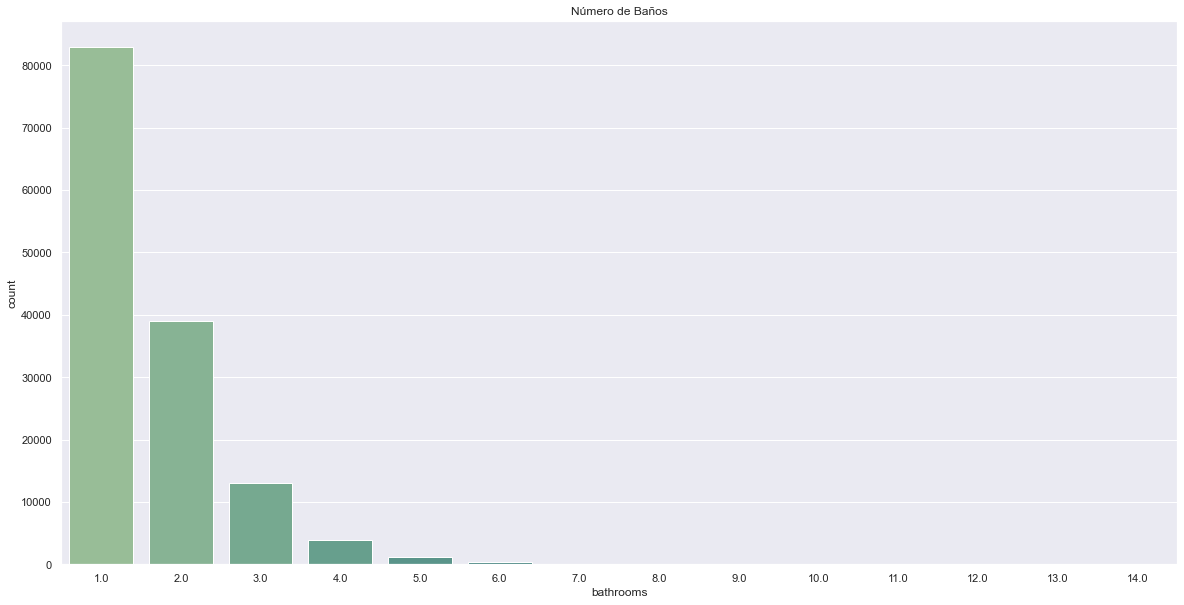

In [10]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, x= "bathrooms", palette='crest').set_title('Número de Baños')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Superficie Total')

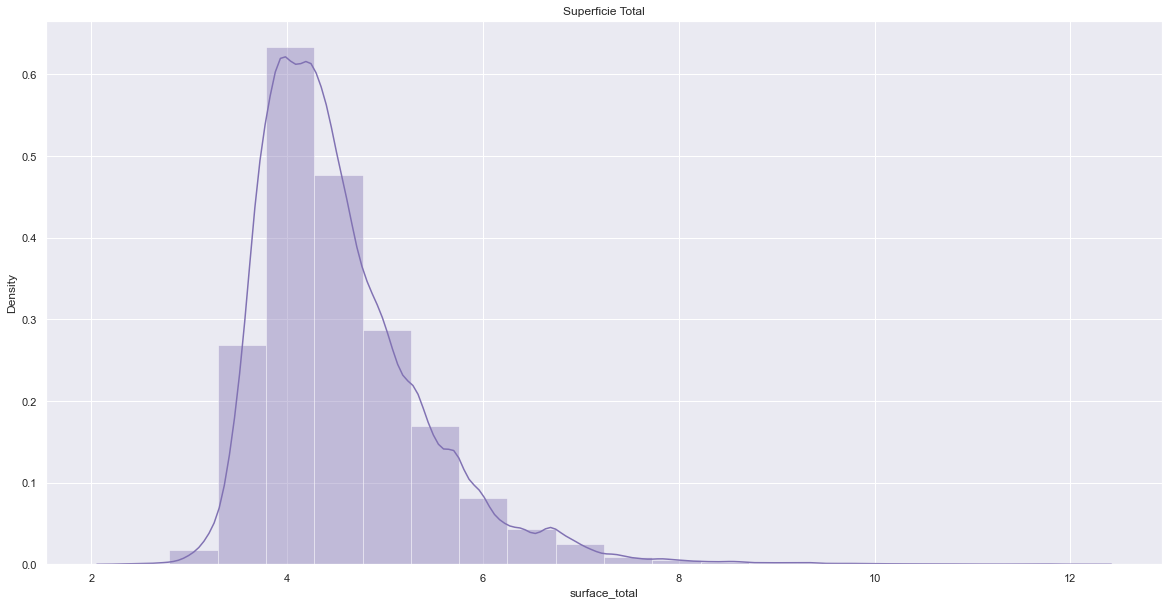

In [11]:
plt.figure(figsize = (20,10))
sns.distplot(np.log(df.surface_total), bins=20, color='m').set_title('Superficie Total')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Superficie Cubierta')

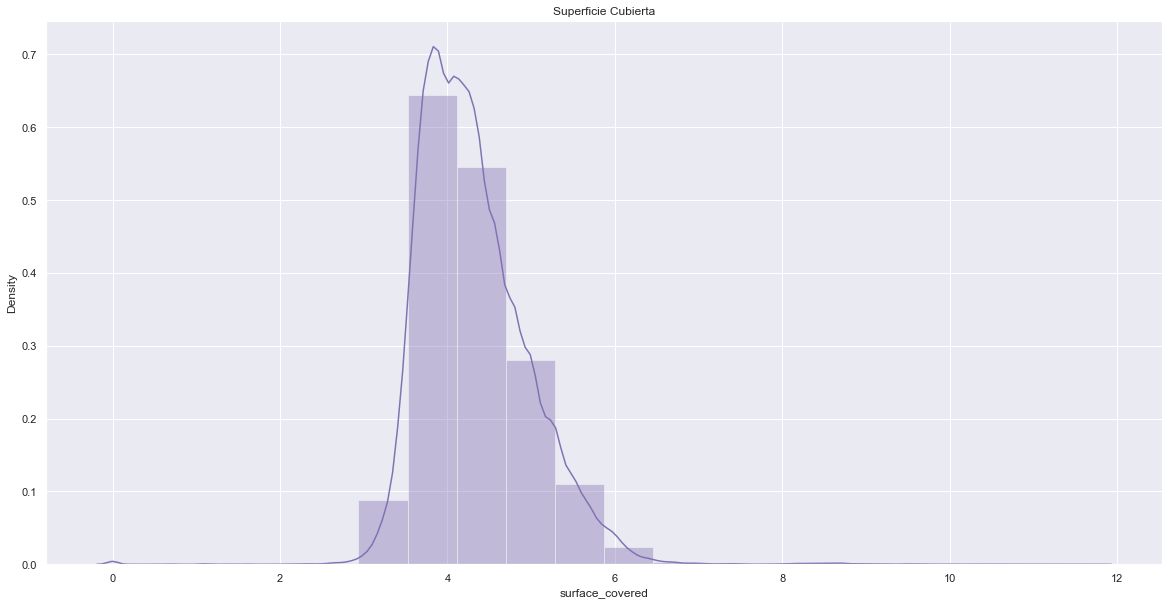

In [11]:
plt.figure(figsize = (20,10))
sns.distplot(np.log(df.surface_covered), bins=20, color='m').set_title('Superficie Cubierta')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface_total'>

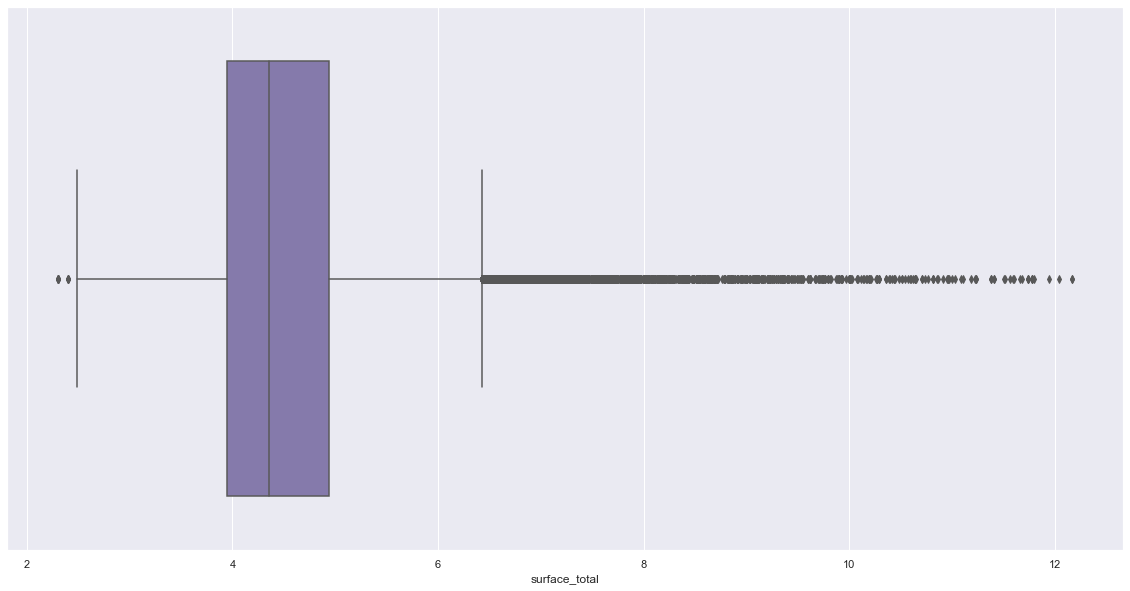

In [13]:
plt.figure(figsize = (20,10))
sns.boxplot(np.log(df.surface_total), color='m')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface_covered'>

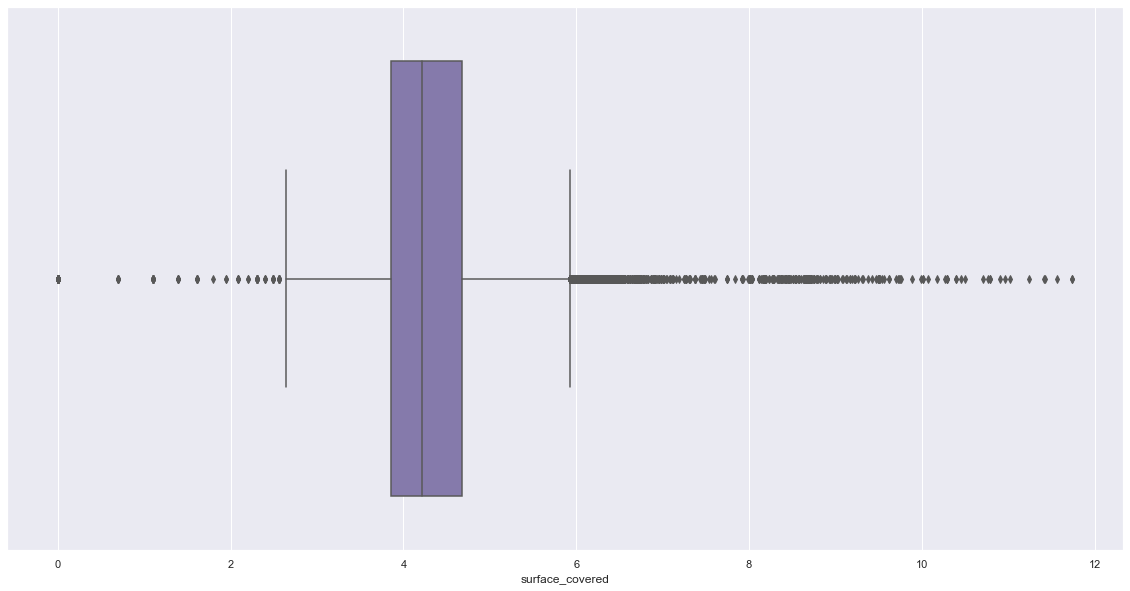

In [12]:
plt.figure(figsize = (20,10))
sns.boxplot(np.log(df.surface_covered), color='m')

Se puede observar la presencia de datos atípicos en ambas variables de superficie y también se puede deducir que los datos se enceuntran muy dispersos con una buena parte de los datos encontrandose por debajo de los 20.000 para superficie cubierta y de los 50.000 para superficie total.

Text(0.5, 1.0, 'Zona')

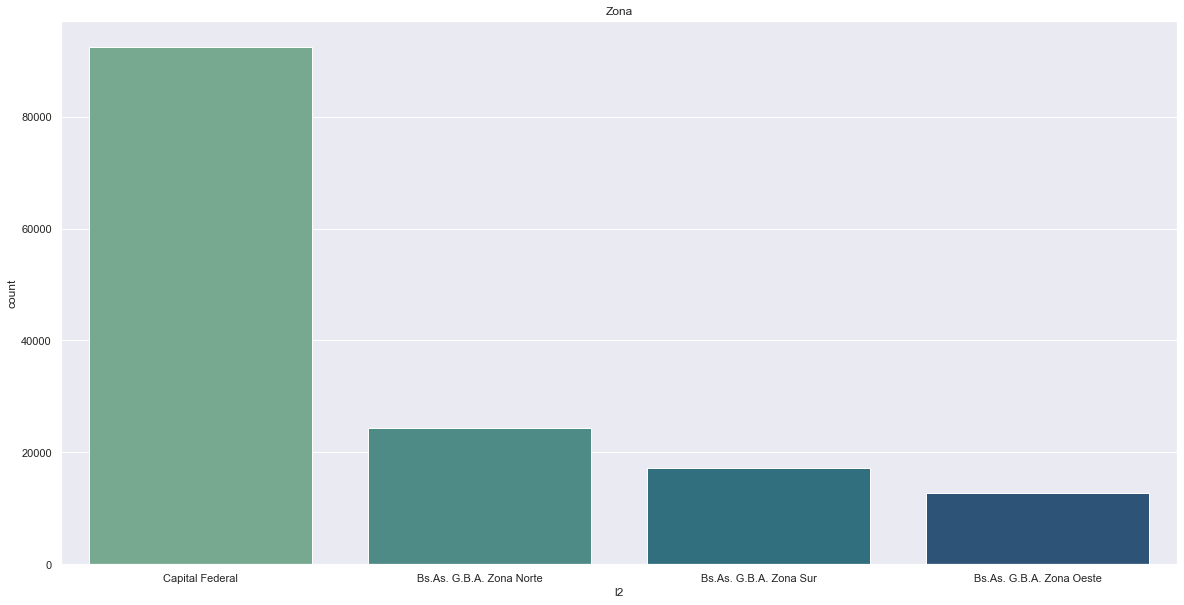

In [13]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, x= "l2", order = df['l2'].value_counts().index, palette= 'crest').set_title('Zona')

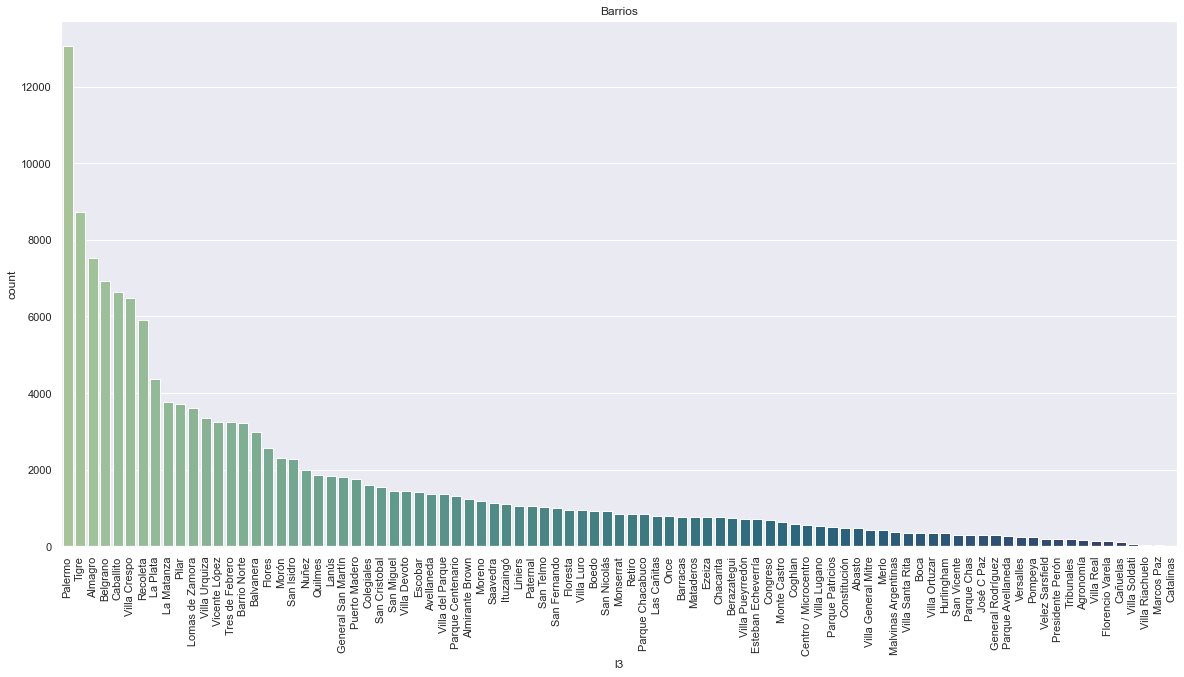

In [14]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, x= "l3", order = df['l3'].value_counts().index, palette= 'crest').set_title('Barrios')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)

<center><b>Modelos</b></center>
Para realizar el modelo de regresión se realiza un filtrado de datos de forma que se considere para el modelo las propiedades cuya superficie cubierta sea menor a la superficie total y las propiedades de tipo PH, departamento y casa. De esta forma las características de propiedades como bodegas no sesgan la predicción del precio del inmueble.


In [15]:
df2 = df[df['surface_total'] > df['surface_covered']]
df2 = df2[(df2['l2'] == "Capital Federal") & (df2.property_type.isin(['Departamento','Casa','PH']))] #filtrando por zona y tipo de propiedades, las más publicadas

Aquí se puede observar como el filtrado reduce las dimensiones del dataset.

In [16]:
df2

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,USD,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,2019-07-31,2020-01-17,2019-07-31,-34.581308,-58.431236,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,USD,Torre Mirabilia - 4 amb - Piso Alto 106m2,Living comedor con acceso a Balcón aterrazadoM...,Departamento,Venta
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta


También se reemplazan los datos nulos de la variable `bathrooms` utilizando la media de esta.

In [17]:
df2['bathrooms'].fillna(df2['bathrooms'].mean(), inplace = True)

In [18]:
df2.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                2903
lon                2903
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [19]:
X = df2[['surface_total', 'bedrooms', 'bathrooms']]
y= df2.price

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39660, 3) (39660,) (16998, 3) (16998,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=1)

In [22]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [23]:
print(linear_model.coef_, linear_model.intercept_)

[5.48093676e+00 2.45900100e+04 1.98961595e+05] -98327.89450081938


Para evaluar los resultados del modelo se hace uso de RMSE para elegir el modelo que presente los errores más bajos entre los modelos utlizados. Ya que los errores están afectados por el efecto de los valores atípicos de superficie, esto no busca mostrar los errores minimos posibles que harían a este modelo más eficiente.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 231550.56072841038
Raíz del error cuadrático medio en Test: 223157.09629212035


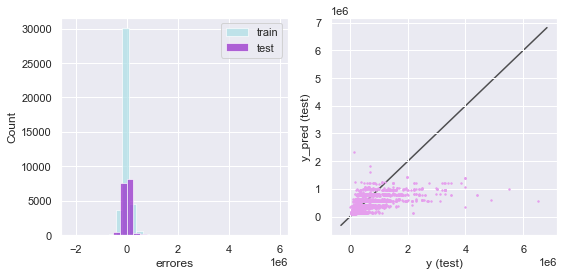

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 127014.50646651903
Raíz del error cuadrático medio en Test: 173114.38247459542


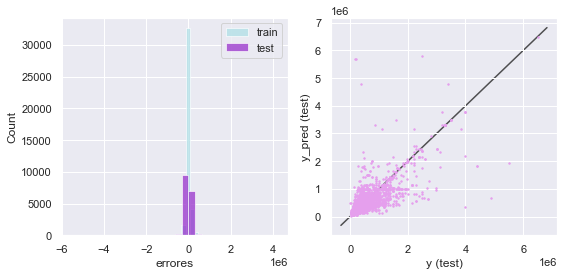

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 145963.46239863578
Raíz del error cuadrático medio en Test: 187340.05523755235


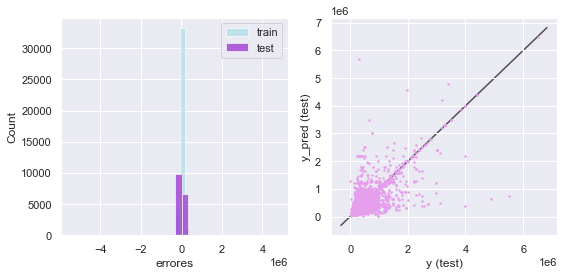

In [33]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
      
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')    
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(np.array(y_train) - y_train_pred, bins = 30, label = 'train', color='powderblue')
    sns.histplot(np.array(y_test) - y_test_pred, bins = 30, label = 'test', color = 'darkorchid')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2, c='#e59fed')    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Teniendo en cuenta los valores de error y la relación entre los datos elegidos y la predicción se elige al modelo de árbol de decisión al presentar los menores errores en el set de prueba (`test`)

<center><b>Conclusiones</b></center>

<justify>El efecto de la irregularidad de distribución de los datos de superficie se puede ver en los errores del modelo incluso después de la remoción de los datos nulos y los outliers por lo que es necesario realizar un escalado a ambas variables para que no afecten el error de forma tan significativa. 
</justify>